Members:
PHAN ĐĂNG KHÔI – 52100241
BÙI QUỐC KHÁNH - 52000771
NGUYỄN ĐẠT KHƯƠNG - 52100973


In [4]:
!pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.1/99.8 MB 2.6 MB/s eta 0:00:38
                                              0.4/99.8 MB 4.5 MB/s eta 0:00:23
                                              1.0/99.8 MB 8.2 MB/s eta 0:00:13
                                              2.2/99.8 MB 12.5 MB/s eta 0:00:08
     -                                        3.4/99.8 MB 15.6 MB/s eta 0:00:07
     -                                        4.7/99.8 MB 17.7 MB/s eta 0:00:06
     --                                       5.7/99.8 MB 19.0 MB/s eta 0:00:05
     --                                       6.6/99.8 MB 19.1 MB/s eta 0:00:05
     --                                       6.6/99.8 MB 19.1 MB/s eta 0:00:05
     ---                                      8.5/99.8 MB 18.7 MB/s eta 0:00:05
     ---                                      9.8/99.8 MB 20.3 MB/s eta 0:00:05
     ----                                    11.2/9


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install seaborn

                                              0.0/294.6 kB ? eta -:--:--
     --------------                         112.6/294.6 kB 3.3 MB/s eta 0:00:01
     ------------------------------------   286.7/294.6 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 294.6/294.6 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,VotingRegressor,BaggingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings

Loading the data

In [7]:
#import the data
df = pd.read_csv("data/diamonds.csv")

Exploratory Data Analysis

In [8]:
#print out the total instances and features in the dataset
df.shape

(53940, 11)

In [9]:
#print out the first 5 instance of the dataset
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [11]:
#the unamed collumn just the index, so we can drop it
df = df.drop(["Unnamed: 0"], axis=1)
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [12]:
#now we check for missing values in the dataset
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [13]:
#the x,y,z dimension measure can be zero, which means that data instance is fault, so we should check to make sure the data set is correct 100%
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape
#you can see clearly that we have lost 20 lines of fault data.

(53920, 10)

Data Visulization

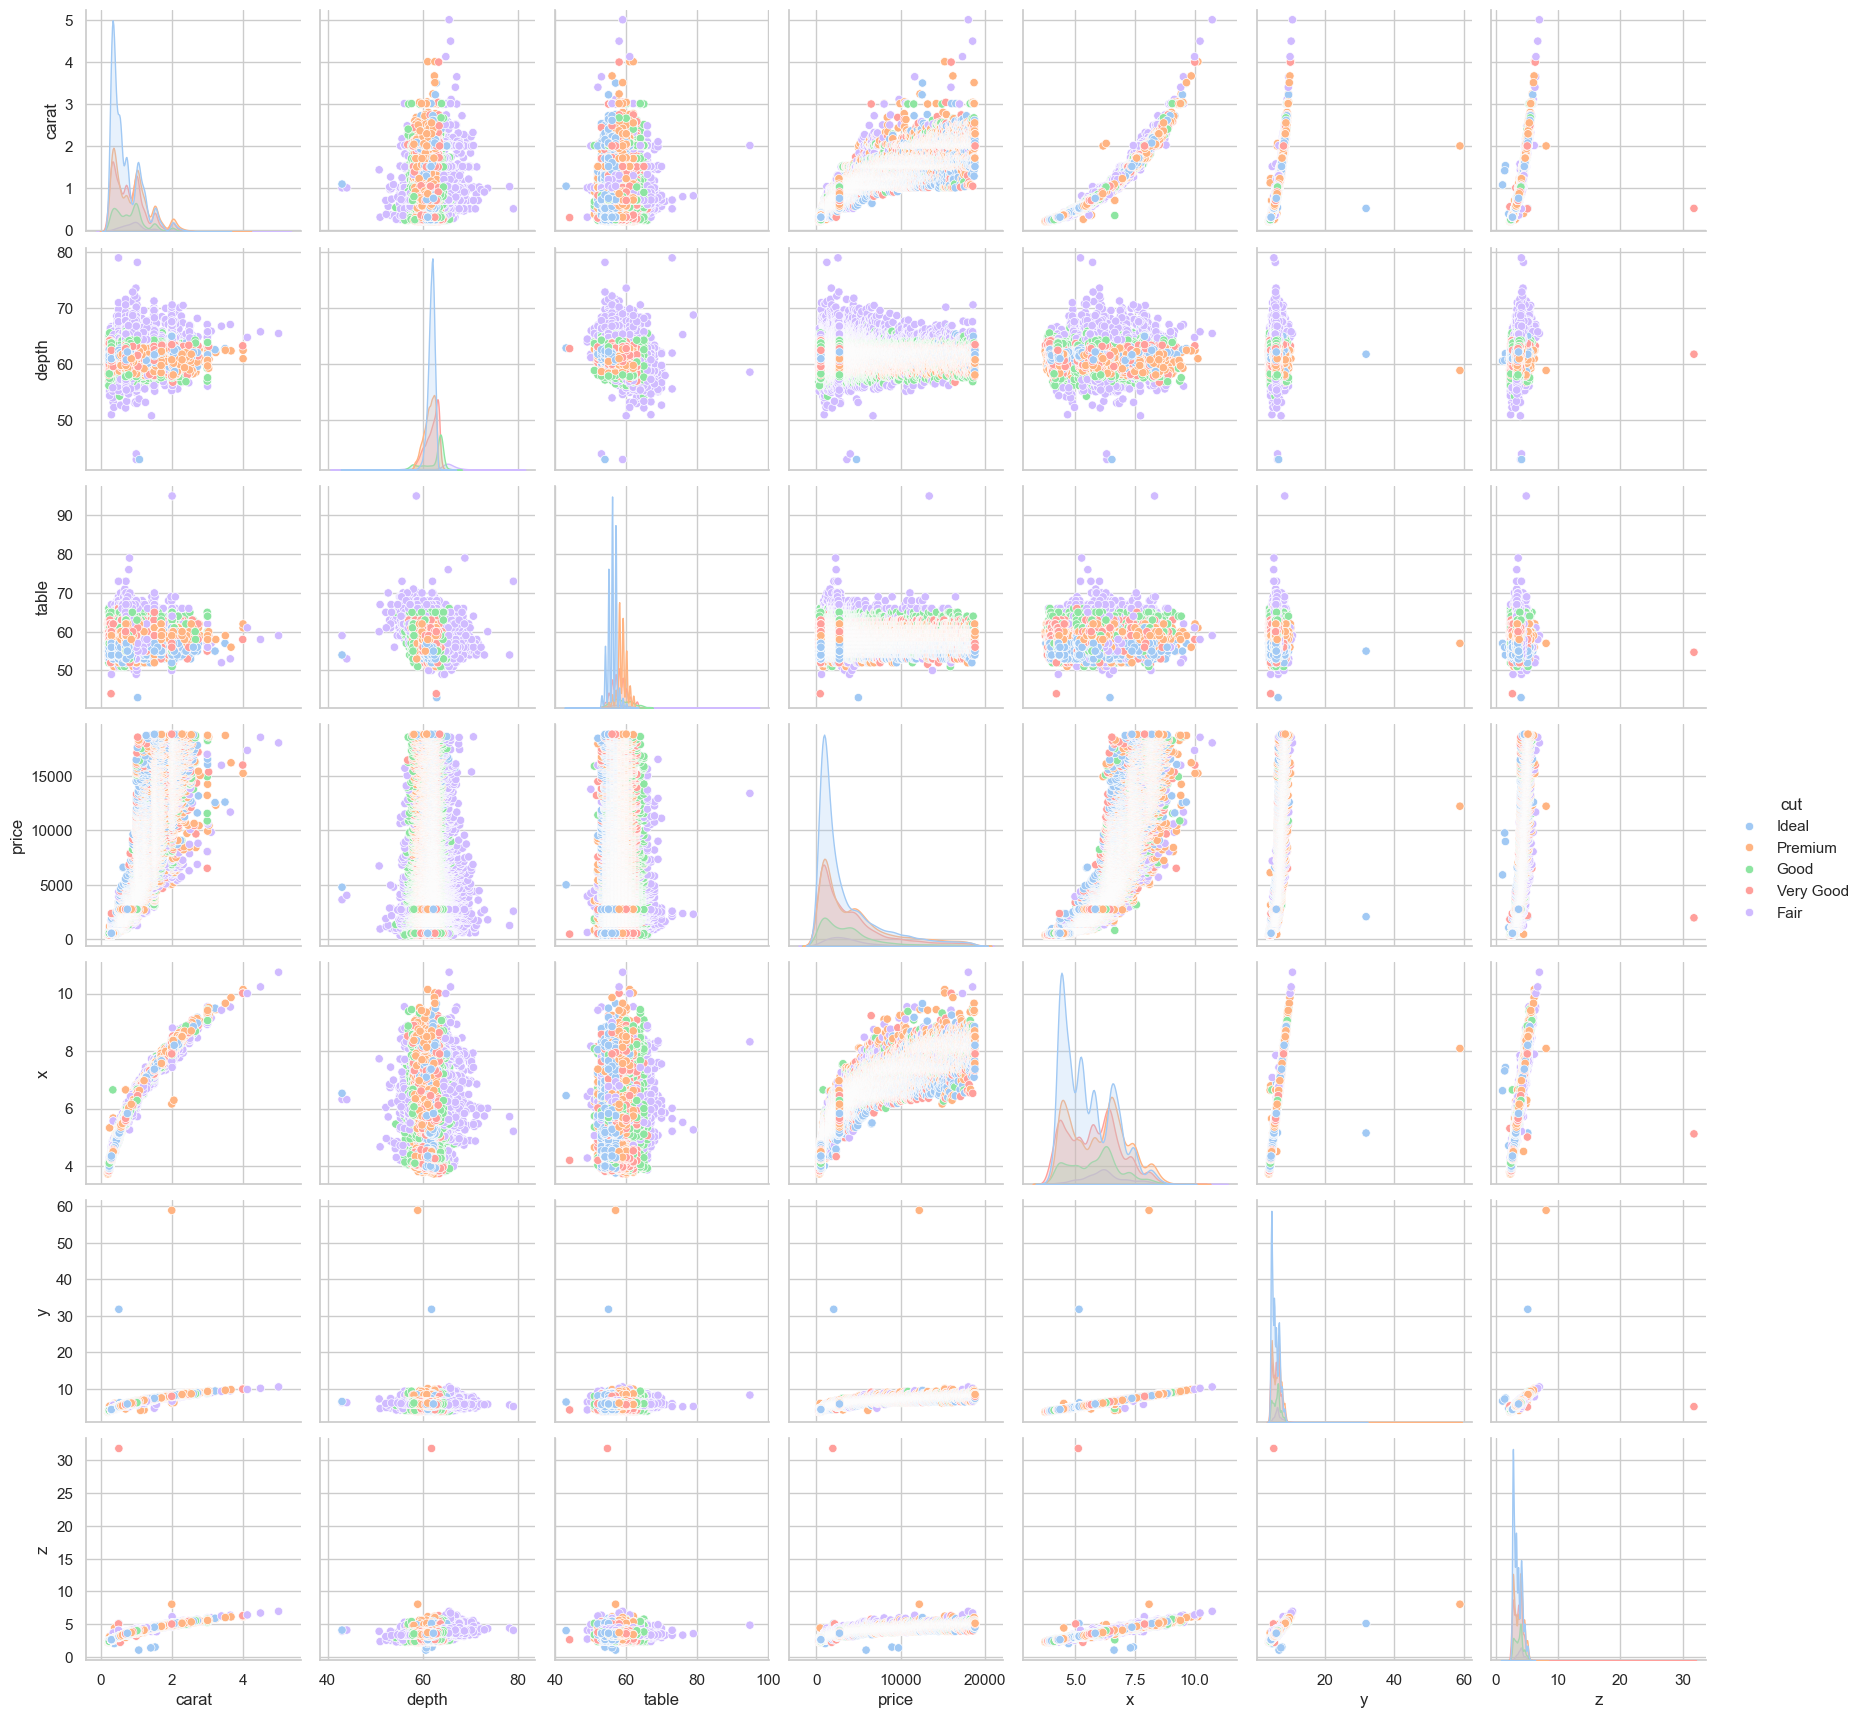

In [14]:
#now we will visualize the realtionship between each pair of variables in the dataset using pairplot
sns.set(style="whitegrid")
sns.pairplot(df,hue="cut",palette="pastel")

Now we can get a few notice
- There some datapoint that is very far away from the others, which will effect the outcome of our regression model.
- "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
- The "depth" should be capped but we must examine the regression line to be sure.
- The "table" featured should be capped too.

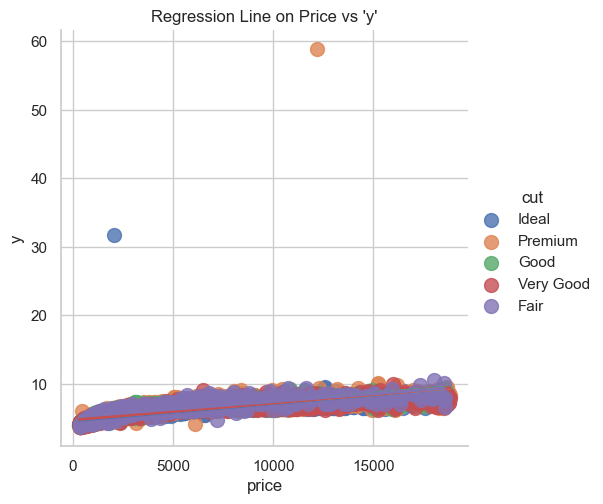

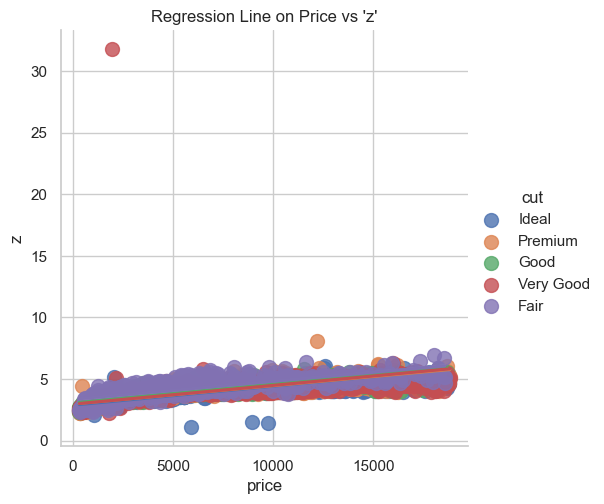

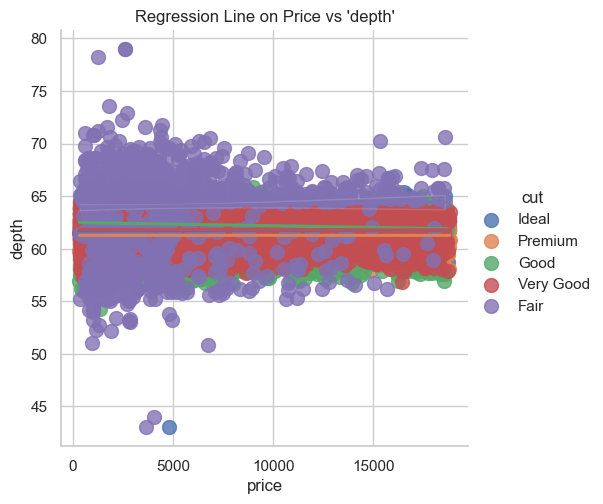

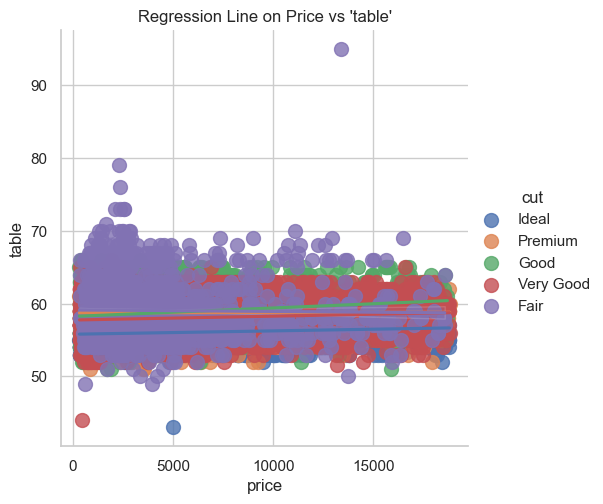

In [15]:
df_subset = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut']]
sns.set(style="whitegrid")

# Create a scatter plot with regression line and color by 'cut'
sns.lmplot(x='price', y='y', hue='cut', data=df_subset, fit_reg=True, scatter_kws={'s': 100})
plt.title("Regression Line on Price vs 'y'")
plt.show()

sns.lmplot(x='price', y='z', hue='cut', data=df_subset, fit_reg=True, scatter_kws={'s': 100})
plt.title("Regression Line on Price vs 'z'")
plt.show()

sns.lmplot(x='price', y='depth', hue='cut', data=df_subset, fit_reg=True, scatter_kws={'s': 100})
plt.title("Regression Line on Price vs 'depth'")
plt.show()

sns.lmplot(x='price', y='table', hue='cut', data=df_subset,fit_reg=True, scatter_kws={'s': 100})
plt.title("Regression Line on Price vs 'table'")
plt.show()


Data Proprocessing

In [16]:
#with this regression plot we can easily see the outliers in the attributes, so now we should drop them
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape
#we lost 13 more instances due to outliers removal.

(53907, 10)

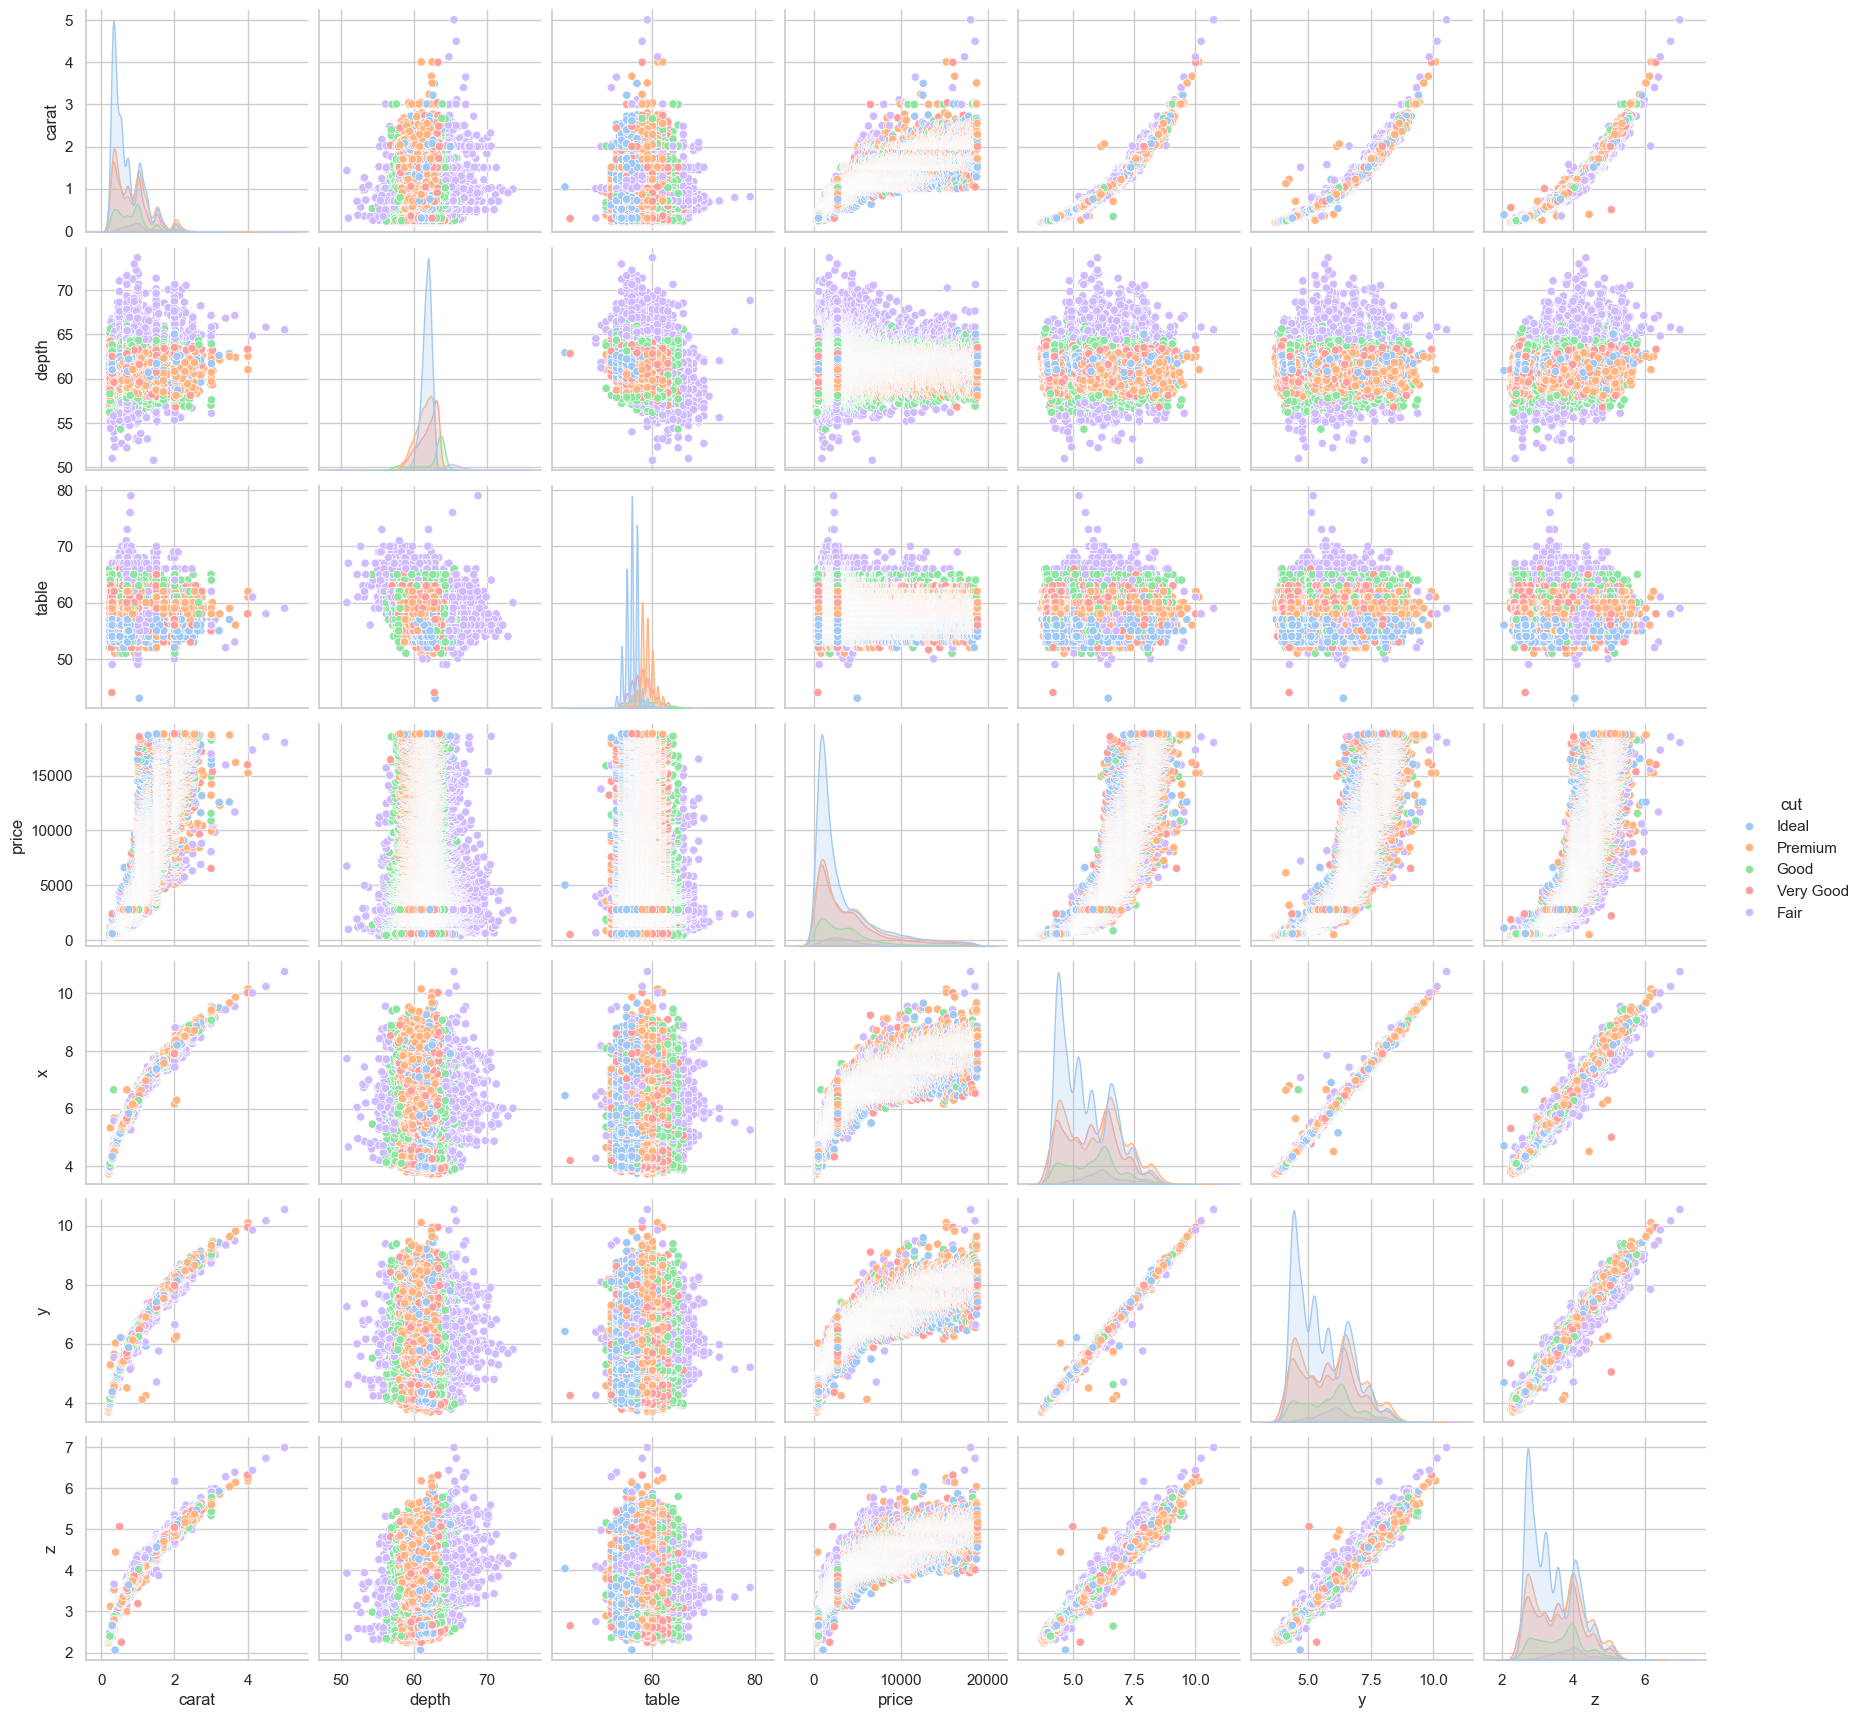

In [17]:
#graph the pair plot again to see what we get
ax=sns.pairplot(df, hue= "cut",palette="pastel")

In [18]:
#now our dataset is much cleaner, next we deal with categorical variable
temp = (df.dtypes == "object")
object_cols = list(temp[temp].index)
print("Category variables collumn: ")
print(object_cols)

Category variables collumn: 
['cut', 'color', 'clarity']


C:\Users\HP\AppData\Local\Temp\ipykernel_4220\1441564397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cut', y='price', data=df, inner="points", palette="pastel")


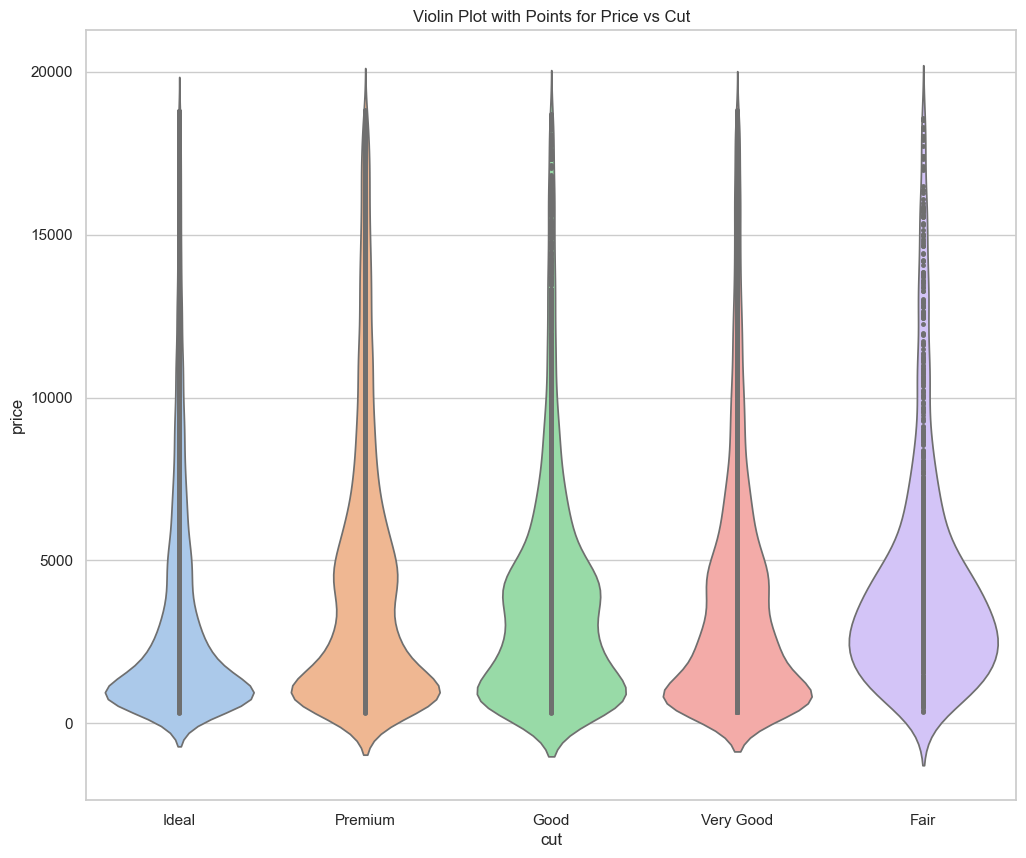

C:\Users\HP\AppData\Local\Temp\ipykernel_4220\1441564397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y='price', data=df, inner="points", palette="pastel")


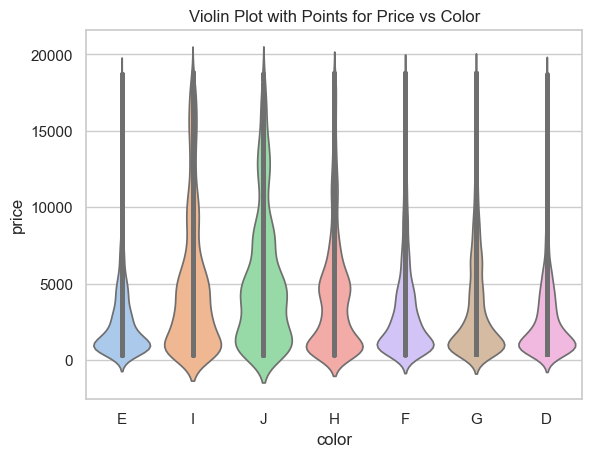

C:\Users\HP\AppData\Local\Temp\ipykernel_4220\1441564397.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='clarity', y='price', data=df, inner="points", palette="pastel")


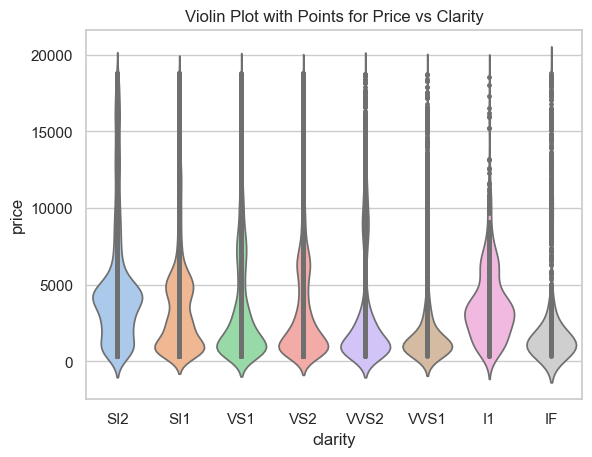

In [19]:
plt.figure(figsize=(12, 10))

# Create a violin plot with points to see the distribution based on these categorys
sns.violinplot(x='cut', y='price', data=df, inner="points", palette="pastel")
plt.title('Violin Plot with Points for Price vs Cut')
plt.show()

sns.violinplot(x='color', y='price', data=df, inner="points", palette="pastel")
plt.title('Violin Plot with Points for Price vs Color')
plt.show()

sns.violinplot(x='clarity', y='price', data=df, inner="points", palette="pastel")
plt.title('Violin Plot with Points for Price vs Clarity')
plt.show()

Label encoding the object datatype columns

In [20]:
#make a copy so that we can make sure that the original dataset is keep intact
label_data = df.copy()

#apply label encoding to each columns with categorical data
label_encoder = LabelEncoder()
for column in object_cols:
    label_data[column] = label_encoder.fit_transform(label_data[column])

label_data.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [21]:
df.describe()

carat         depth         table         price             x  \
count  53907.000000  53907.000000  53907.000000  53907.000000  53907.000000   
mean       0.797628     61.749741     57.455948   3930.584470      5.731463   
std        0.473765      1.420119      2.226153   3987.202815      1.119384   
min        0.200000     50.800000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5322.000000      6.540000   
max        5.010000     73.600000     79.000000  18823.000000     10.740000   

                  y             z  
count  53907.000000  53907.000000  
mean       5.733292      3.539441  
std        1.111252      0.691434  
min        3.680000      2.060000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       10.540000      6.980000

Correlation Plot

<Figure size 1000x800 with 0 Axes>

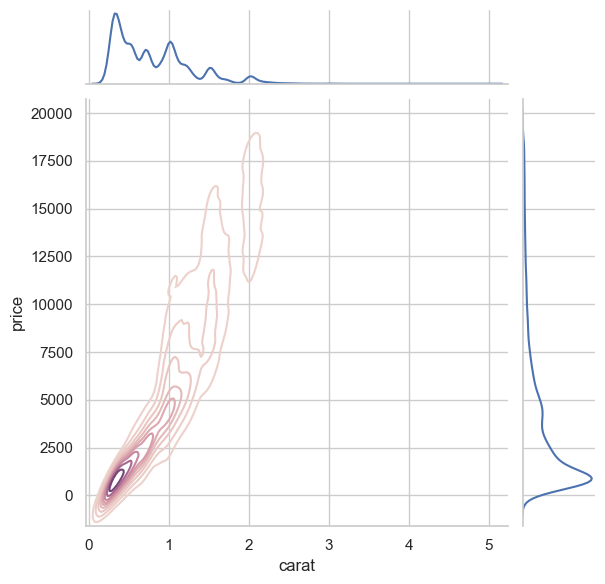

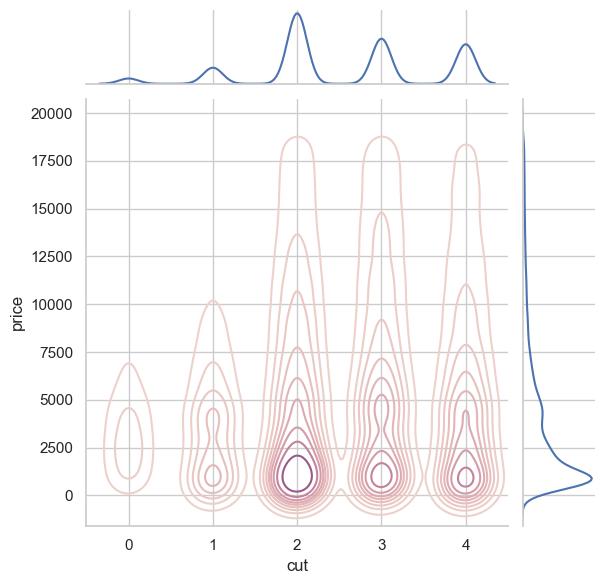

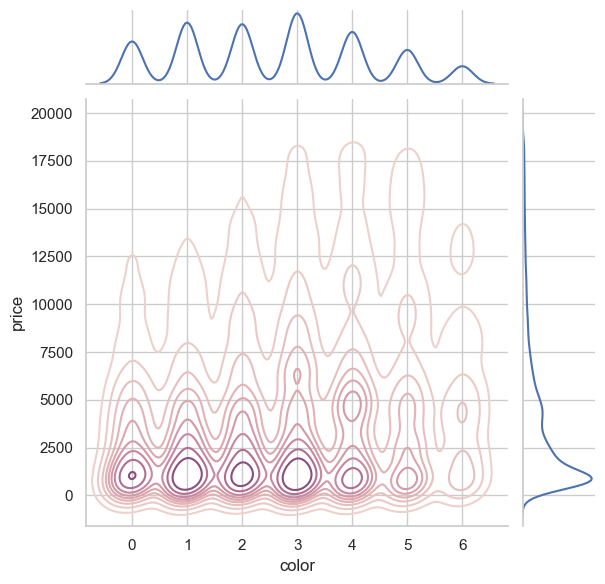

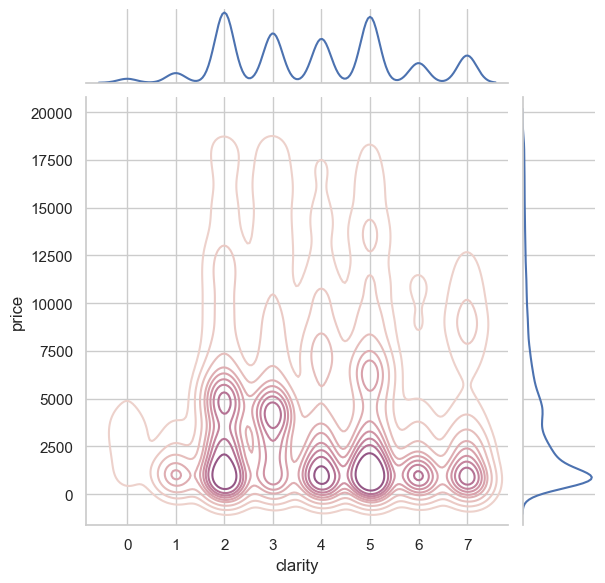

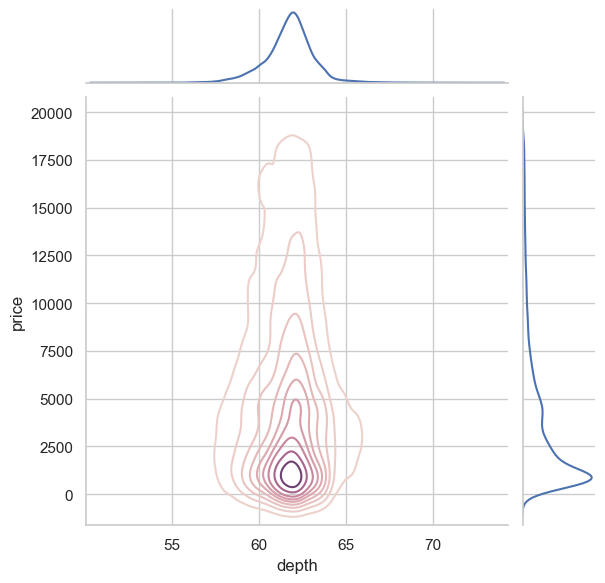

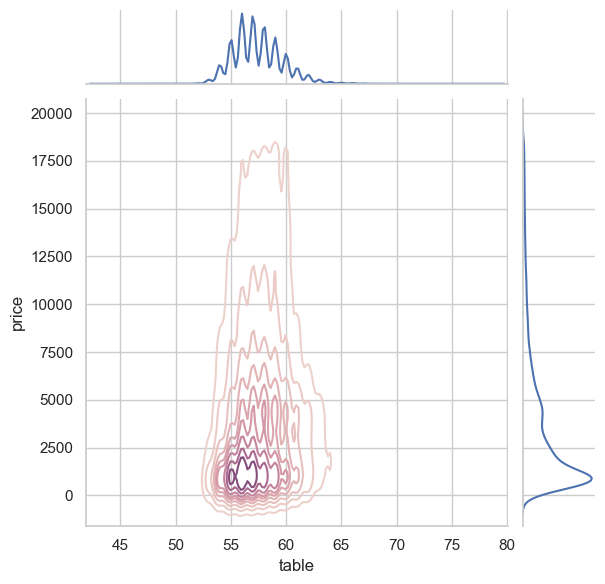

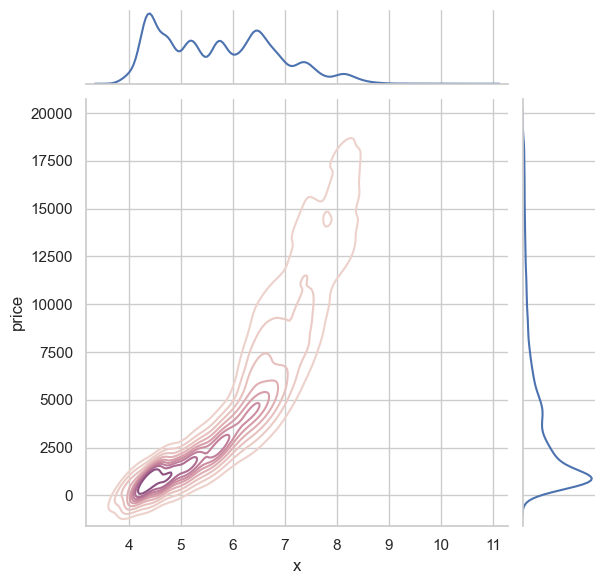

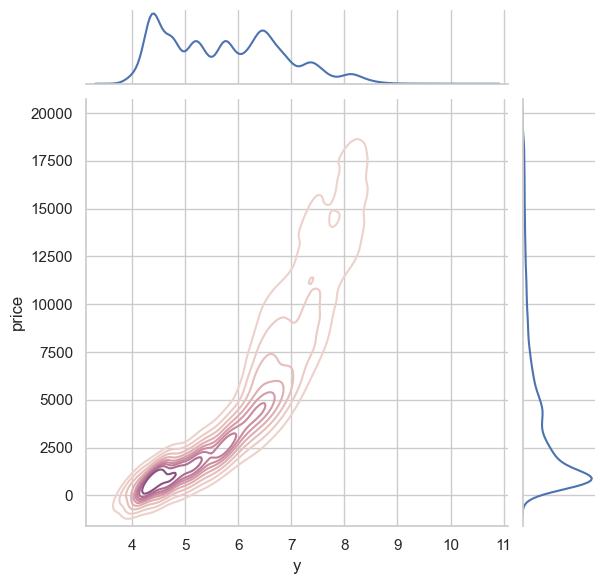

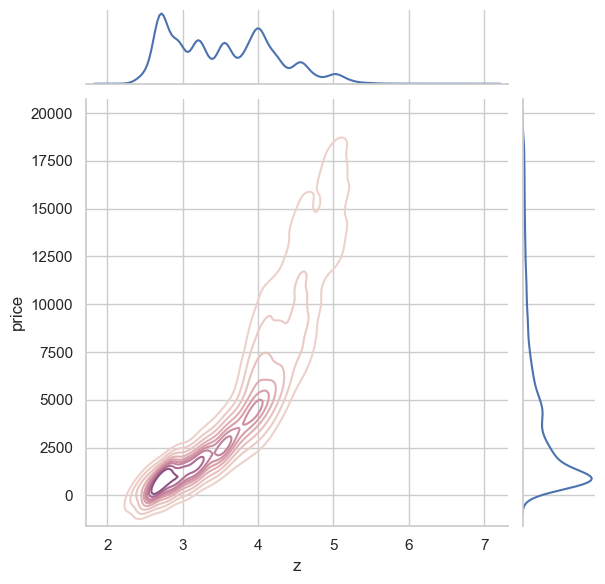

In [22]:
plt.figure(figsize=(10, 8))
pink_color = sns.cubehelix_palette(as_cmap=True)
sns.jointplot(x=label_data["carat"], y=label_data["price"], kind="kde", cmap=pink_color)
sns.jointplot(x=label_data["cut"], y=label_data["price"], kind="kde", cmap=pink_color)
sns.jointplot(x=label_data["color"], y=label_data["price"], kind="kde", cmap=pink_color)
sns.jointplot(x=label_data["clarity"], y=label_data["price"], kind="kde", cmap=pink_color)
sns.jointplot(x=label_data["depth"], y=label_data["price"], kind="kde", cmap=pink_color)
sns.jointplot(x=label_data["table"], y=label_data["price"], kind="kde", cmap=pink_color)
sns.jointplot(x=label_data["x"], y=label_data["price"], kind="kde", cmap=pink_color)
sns.jointplot(x=label_data["y"], y=label_data["price"], kind="kde", cmap=pink_color)
sns.jointplot(x=label_data["z"], y=label_data["price"], kind="kde", cmap=pink_color)

plt.show()

Correclation Matrix

<AxesSubplot:>

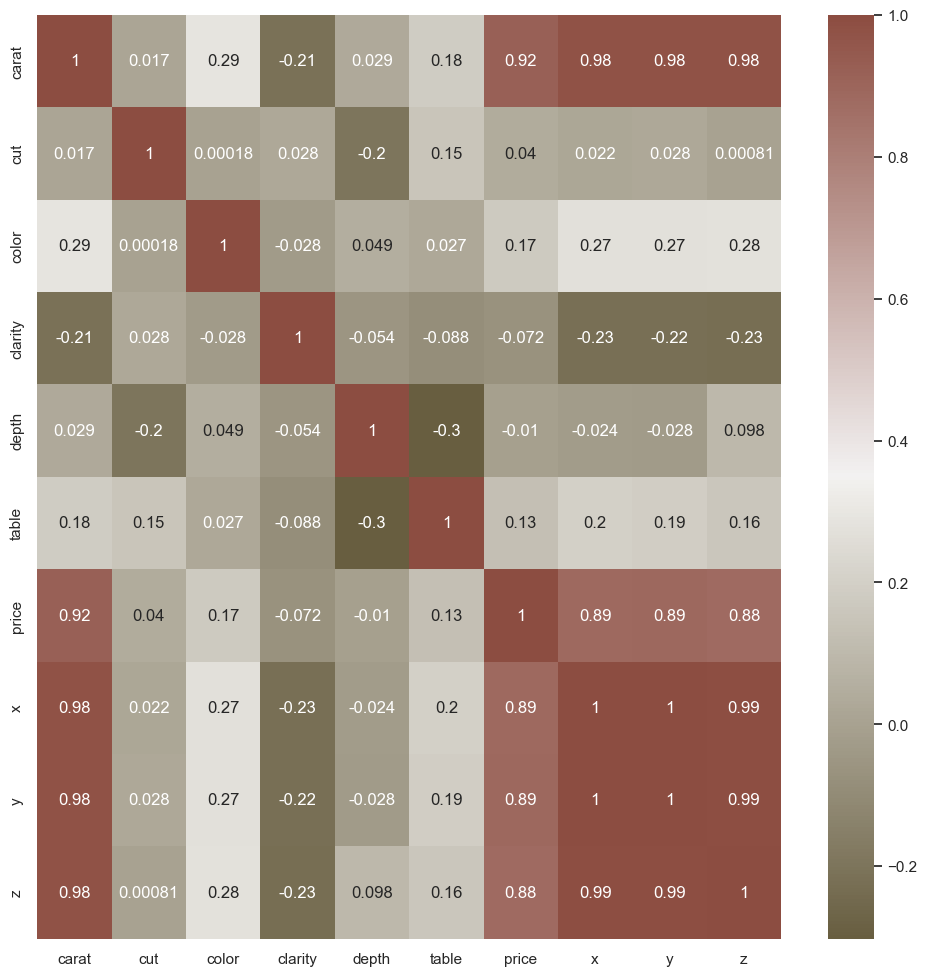

In [24]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

Model Building
- Setting up features and target
- Build a pipeline of standard scalar and model for five different regressors.
- Fit all the models on training data
- Get mean of cross-validation on the training set for all the models for negative root mean square error
- Pick the model with the best cross-validation score
- Fit the best model on the training set and get

In [25]:
#assigning the features as X and target as y
X = label_data.drop(["price"],axis=1)
y = label_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [31]:
#building pipelines of standard scaler and model for various regressors

pipeline_linearRegression=Pipeline([("scalar",StandardScaler()),
                     ("lr_regressor",LinearRegression())])

pipeline_decisionTreeRegressor = Pipeline([("scaler1",StandardScaler()),
                        ("dt_regressor",DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1))])

pipeline_randomForestRegressor=Pipeline([("scalar2",StandardScaler()),
                     ("rf_regressor",RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1))])


pipeline_kNeightborsRegressors=Pipeline([("scalar3",StandardScaler()),
                     ("knn_regressor",KNeighborsRegressor(n_neighbors=5))])

# Add dropout,early stopping to XGBRegressor
pipeline_xgbRegressor=Pipeline([("scalar4",StandardScaler()),
                     ("xgb_regressor",XGBRegressor(booster='gbtree', objective='reg:squarederror'))])
#ensemble learning
pipeline_adaBoostRegressor=Pipeline([("scalar5",StandardScaler()),
                     ("ada_regressor",AdaBoostRegressor(n_estimators=50, learning_rate=0.1))])

pipeline_gradientBoostingRegressor=Pipeline([("scalar6",StandardScaler()),
                     ("grb_regressor",GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5))])
pipeline_supportVectorRegressor=Pipeline([("scalar7",StandardScaler()),
                     ("svr_regressor",SVR(kernel='rbf', C=1.0))])  

pipelineList = [pipeline_linearRegression, pipeline_decisionTreeRegressor,
                pipeline_randomForestRegressor, pipeline_kNeightborsRegressors,
                pipeline_xgbRegressor, pipeline_adaBoostRegressor,
                pipeline_gradientBoostingRegressor]

pipeline_dict = {0: "LinearRegression", 1: "DecisionTreeRegressor", 2: "RandomForestRegressor",
                 3: "KNeighborsRegressor", 4: "XGBRegressor", 5: "AdaBoostRegressor",
                 6: "GradientBoostingRegressor"}

In [33]:
#fit the pipelines
for pipeline in pipelineList:
    pipeline.fit(X_train,y_train)

In [32]:
#support vector regressor:
pipeline_supportVectorRegressor.fit(X_train,y_train)

Pipeline(steps=[('scalar7', StandardScaler()), ('svr_regressor', SVR())])

In [36]:

cross_value_results_rms = []
for i , model in enumerate(pipelineList):
    cv_score = cross_val_score(model,X_train,y_train,scoring="neg_root_mean_squared_error",cv=10)
    cross_value_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTreeRegressor: -1085.371938 
RandomForestRegressor: -571.618323 
KNeighborsRegressor: -823.656082 
XGBRegressor: -547.645088 
AdaBoostRegressor: -1339.950890 
GradientBoostingRegressor: -544.525909 


In [35]:
cv_score_svr = cross_val_score(pipeline_supportVectorRegressor,X_train,y_train,scoring="neg_root_mean_squared_error",cv=10)
print("Support Vector Regressor : ",cv_score_svr.mean())

Support Vector Regressor :  -2893.913992173201


In [40]:
#make prediction on test data with random Forest
predict = pipeline_randomForestRegressor.predict(X_test)

In [41]:
#model evaluation for random forest Regressor
print("R^2:",metrics.r2_score(y_test, predict))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predict))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predict))
print("MSE:",metrics.mean_squared_error(y_test, predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predict)))

R^2: 0.978774608801303
Adjusted R^2: 0.9787604238662181
MAE: 305.5248102835677
MSE: 332980.20705361484
RMSE: 577.0443718238788


In [42]:
#make prediction on test data with xgb regressor model
predict = pipeline_xgbRegressor.predict(X_test)

In [43]:
#model evaluation
print("R^2:",metrics.r2_score(y_test, predict))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predict))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predict))
print("MSE:",metrics.mean_squared_error(y_test, predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predict)))

R^2: 0.9803842673897721
Adjusted R^2: 0.9803711581899881
MAE: 280.1733446465832
MSE: 307728.16599314264
RMSE: 554.7325175191577


In [44]:
#make prediction on test data with linear regressor model
predict = pipeline_linearRegression.predict(X_test)

In [45]:
#model evaluation
print("R^2:",metrics.r2_score(y_test, predict))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predict))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predict))
print("MSE:",metrics.mean_squared_error(y_test, predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predict)))

R^2: 0.8890105065854335
Adjusted R^2: 0.8889363322748423
MAE: 849.3507396470688
MSE: 1741183.6678057066
RMSE: 1319.5391876733736


In [46]:
#make prediction on test data with Support Vector Regressor
predict = pipeline_supportVectorRegressor.predict(X_test)

In [47]:
#model evaluation
print("R^2:",metrics.r2_score(y_test, predict))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predict))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predict))
print("MSE:",metrics.mean_squared_error(y_test, predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predict)))

R^2: 0.5092214618325641
Adjusted R^2: 0.5088934743933788
MAE: 1360.7164578059476
MSE: 7699247.459170288
RMSE: 2774.751783343924


In [48]:
#model evaluation for decision Tree
predict = pipeline_decisionTreeRegressor.predict(X_test)
print("R^2:",metrics.r2_score(y_test, predict))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predict))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predict))
print("MSE:",metrics.mean_squared_error(y_test, predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predict)))

R^2: 0.9283421899002124
Adjusted R^2: 0.9282943009649709
MAE: 584.2697732058357
MSE: 1124155.1319676342
RMSE: 1060.2618223663596


In [49]:
#model evaluation for k Neightbors
predict = pipeline_kNeightborsRegressors.predict(X_test)
print("R^2:",metrics.r2_score(y_test, predict))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predict))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predict))
print("MSE:",metrics.mean_squared_error(y_test, predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predict)))

R^2: 0.959938886957369
Adjusted R^2: 0.959912114103921
MAE: 402.92605179194186
MSE: 628471.7012213401
RMSE: 792.7620710032362


In [50]:
#model evaluation for ada Boost Regressor
predict = pipeline_adaBoostRegressor.predict(X_test)
print("R^2:",metrics.r2_score(y_test, predict))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predict))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predict))
print("MSE:",metrics.mean_squared_error(y_test, predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predict))) 

R^2: 0.8899875457290481
Adjusted R^2: 0.8899140243739996
MAE: 800.9974098800076
MSE: 1725856.0494219146
RMSE: 1313.7184056798149


In [52]:
#model evaluation for gradient Boosting Regressor
predict = pipeline_gradientBoostingRegressor.predict(X_test)
print("R^2:",metrics.r2_score(y_test, predict))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predict))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predict))
print("MSE:",metrics.mean_squared_error(y_test, predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predict)))

R^2: 0.9810649552389713
Adjusted R^2: 0.9810523009430739
MAE: 288.27251304030244
MSE: 297049.6546364651
RMSE: 545.0226184631837


In [53]:

# Standardize the data for FRR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Create a Feedforward Neural Network (MLPRegressor) 
#Implement dropout layers within the neural network to randomly drop a fraction 
#of the neurons during training, preventing overfitting
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=7, alpha=0.001, early_stopping=True, validation_fraction=0.1)

# Train the model
mlp.fit(X_train_scaled, y_train)



In [56]:
# Make predictions on the test set
predict_mlp = mlp.predict(X_test_scaled)

In [57]:
print("R^2:",metrics.r2_score(y_test, predict_mlp))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predict_mlp))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predict_mlp))
print("MSE:",metrics.mean_squared_error(y_test, predict_mlp))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predict_mlp)))

R^2: 0.9770530695429176
Adjusted R^2: 0.9770377341026477
MAE: 325.7855021958261
MSE: 359987.41240224
RMSE: 599.9895102435041


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dropout

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data to fit a 1D CNN
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.25, random_state=7)


In [59]:
# Create a  CNN model
cnn = Sequential()


cnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Dropout(0.5))  # Add dropout after Conv1D layer
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))  # Add dropout after Dense layer
cnn.add(Dense(1, activation='linear'))
# Compile the model
cnn.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
# Train the model
cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1011/1011 [==============================] - 8s 5ms/step - loss: 17990978.0000 - val_loss: 7913333.0000
Epoch 2/10
1011/1011 [==============================] - 3s 3ms/step - loss: 6552548.0000 - val_loss: 3695549.7500
Epoch 3/10
1011/1011 [==============================] - 3s 3ms/step - loss: 4911682.5000 - val_loss: 2790081.7500
Epoch 4/10
1011/1011 [==============================] - 3s 3ms/step - loss: 4388496.5000 - val_loss: 2434113.0000
Epoch 5/10
1011/1011 [==============================] - 3s 3ms/step - loss: 4076405.0000 - val_loss: 2270454.0000
Epoch 6/10
1011/1011 [==============================] - 3s 3ms/step - loss: 3863764.7500 - val_loss: 2188889.2500
Epoch 7/10
1011/1011 [==============================] - 3s 3ms/step - loss: 3860290.0000 - val_loss: 2128811.5000
Epoch 8/10
1011/1011 [==============================] - 3s 3ms/step - loss: 3784429.2500 - val_loss: 2061619.2500
Epoch 9/10
1011/1011 [==============================] - 3s 3ms/step - loss: 3677270.000

In [61]:

# Make predictions on the test set
predict_cnn = cnn.predict(X_test)

422/422 [==============================] - 1s 3ms/step


In [63]:
from sklearn import metrics
print("R^2:",metrics.r2_score(y_test, predict_cnn))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predict_cnn))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predict_cnn))
print("MSE:",metrics.mean_squared_error(y_test, predict_cnn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predict_cnn)))

R^2: 0.8739286515187896
Adjusted R^2: 0.8738443980000898
MAE: 851.7557799844614
MSE: 1977785.1596619312
RMSE: 1406.3374984910029
